In [2]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import pandas as pd

import warnings

import math
warnings.filterwarnings('ignore')

import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM,Dense

plt.style.use(style="seaborn")
%matplotlib inline

In [109]:
df= pd.read_csv(r"C:\Users\omami\OneDrive\Desktop\Sem_2_ISI\Time series\Project\Dataset\Tata_steel(18-21).csv")

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           991 non-null    object 
 1   series         991 non-null    object 
 2   OPEN           991 non-null    object 
 3   HIGH           991 non-null    object 
 4   LOW            991 non-null    object 
 5   PREV. CLOSE    991 non-null    object 
 6   ltp            991 non-null    object 
 7   close          991 non-null    object 
 8   vwap           991 non-null    object 
 9   52W H          991 non-null    object 
 10  52W L          991 non-null    float64
 11  VOLUME         991 non-null    int64  
 12  VALUE          991 non-null    object 
 13  No of trades   991 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 108.5+ KB


In [111]:
df=df.rename(columns={"Date " :"Date","close ":"close"})

In [112]:
## converting Date in date time format
df['Date'] = pd.to_datetime(df['Date'])
df=df.sort_values(by='Date')

In [113]:
df.set_index("Date",drop=True,inplace=True)

In [114]:
df["close"]=df["close"].str.replace(",","")
df["close"]=pd.to_numeric(df["close"])

In [115]:
df=df[["close"]]

In [116]:
df.head(5)

,close
Date,
2018-01-01,722.20
2018-01-02,729.30
2018-01-03,734.95
2018-01-04,760.25
2018-01-05,770.70


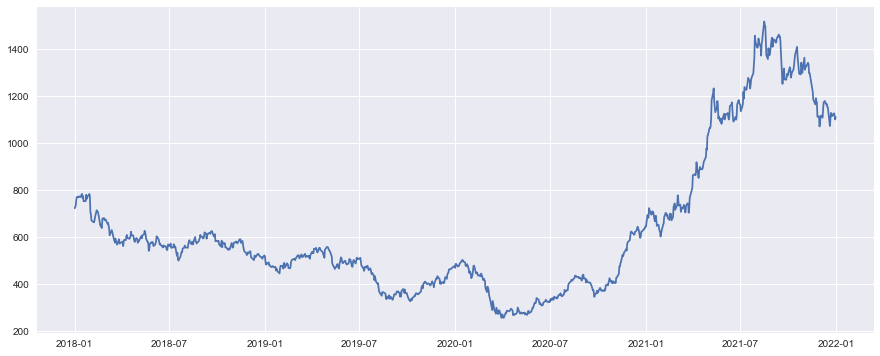

In [117]:
plt.figure(1,figsize=(15,6))
plt.plot(df.close)

### calculate percentage change

###  We can see mean is canstant

In [118]:
data=df.filter(["close"])

dataset=data.values

In [119]:
dataset

array([[ 722.2 ],
       [ 729.3 ],
       [ 734.95],
       [ 760.25],
       [ 770.7 ],
       [ 768.75],
       [ 772.3 ],
       [ 772.85],
       [ 770.95],
       [ 770.25],
       [ 783.5 ],
       [ 765.75],
       [ 774.  ],
       [ 751.75],
       [ 753.  ],
       [ 752.2 ],
       [ 779.75],
       [ 762.1 ],
       [ 769.15],
       [ 783.15],
       [ 775.85],
       [ 705.05],
       [ 696.75],
       [ 670.45],
       [ 664.05],
       [ 664.5 ],
       [ 661.8 ],
       [ 671.45],
       [ 685.3 ],
       [ 713.1 ],
       [ 708.  ],
       [ 700.55],
       [ 689.75],
       [ 648.85],
       [ 651.3 ],
       [ 640.95],
       [ 637.55],
       [ 677.75],
       [ 680.2 ],
       [ 671.75],
       [ 671.6 ],
       [ 675.05],
       [ 655.9 ],
       [ 659.75],
       [ 647.7 ],
       [ 635.9 ],
       [ 606.75],
       [ 622.9 ],
       [ 628.85],
       [ 620.55],
       [ 611.75],
       [ 600.2 ],
       [ 574.95],
       [ 593.  ],
       [ 582.25],
       [ 5

In [120]:
training_data_size=math.ceil(len(df)*.85)
training_data_size

843

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [123]:
np.std(scaled_data)

0.2450184805992504

In [124]:
np.mean(scaled_data)

0.2997348275274691

In [125]:
train_data=scaled_data[0:training_data_size,:]
x_train=[]
y_train=[]
n=60
for i in range(n,len(train_data)):
    x_train.append(train_data[i-n:i,0])
    y_train.append(train_data[i,0])
    if i<61:
        print(x_train)
        print(y_train)
        

[array([0.37012602, 0.37573579, 0.3801999 , 0.40018963, 0.40844625,
       0.40690554, 0.40971043, 0.41014498, 0.40864378, 0.4080907 ,
       0.41855963, 0.40453522, 0.41105361, 0.39347371, 0.39446134,
       0.39382926, 0.41559673, 0.40165133, 0.40722159, 0.4182831 ,
       0.41251531, 0.35657567, 0.35001778, 0.32923794, 0.32418125,
       0.3245368 , 0.32240351, 0.33002805, 0.34097104, 0.36293604,
       0.35890649, 0.35302019, 0.34448702, 0.31217161, 0.31410738,
       0.30592976, 0.30324339, 0.33500573, 0.33694149, 0.33026508,
       0.33014657, 0.33287244, 0.31774187, 0.32078379, 0.31126299,
       0.30193971, 0.27890807, 0.29166831, 0.29636945, 0.28981156,
       0.28285861, 0.27373286, 0.25378264, 0.26804409, 0.25955043,
       0.25848378, 0.24710623, 0.25899735, 0.26567376, 0.25070122])]
[0.25682455655196923]


In [126]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(783, 60, 1)

In [127]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [128]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [129]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [140]:
model.fit(x_train,y_train, batch_size=1,epochs=10)

Epoch 1/10
783/783 [==============================] - 23s 29ms/step - loss: 2.6304e-04
Epoch 2/10
783/783 [==============================] - 22s 28ms/step - loss: 2.6271e-04
Epoch 3/10
783/783 [==============================] - 22s 28ms/step - loss: 2.3750e-04
Epoch 4/10
783/783 [==============================] - 22s 28ms/step - loss: 2.8108e-04
Epoch 5/10
783/783 [==============================] - 22s 28ms/step - loss: 3.7370e-04
Epoch 6/10
783/783 [==============================] - 23s 30ms/step - loss: 2.1411e-04
Epoch 7/10
783/783 [==============================] - 23s 30ms/step - loss: 1.8989e-04
Epoch 8/10
783/783 [==============================] - 21s 27ms/step - loss: 2.4264e-04
Epoch 9/10
783/783 [==============================] - 26s 33ms/step - loss: 3.3547e-04
Epoch 10/10
783/783 [==============================] - 23s 30ms/step - loss: 3.1750e-04


In [131]:
test_data=scaled_data[training_data_size-n:,:]
x_test=[]
y_test=dataset[training_data_size:,:]
for i in range(n,len(test_data)):
    x_test.append(test_data[i-n:i,0])

In [132]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [133]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 10ms/step


In [134]:
predi=model.predict(x_train)
predi=scaler.inverse_transform(predi)

25/25 [==============================] - 0s 10ms/step


####  LSTM network the input for each LSTM layer needs to contain the following information
1- The number of Observation
2- The time Steps
3- the features

Therefore we need to add a temporal dimension compared to a classical network
(number of observation, number of steps number of featurses per step

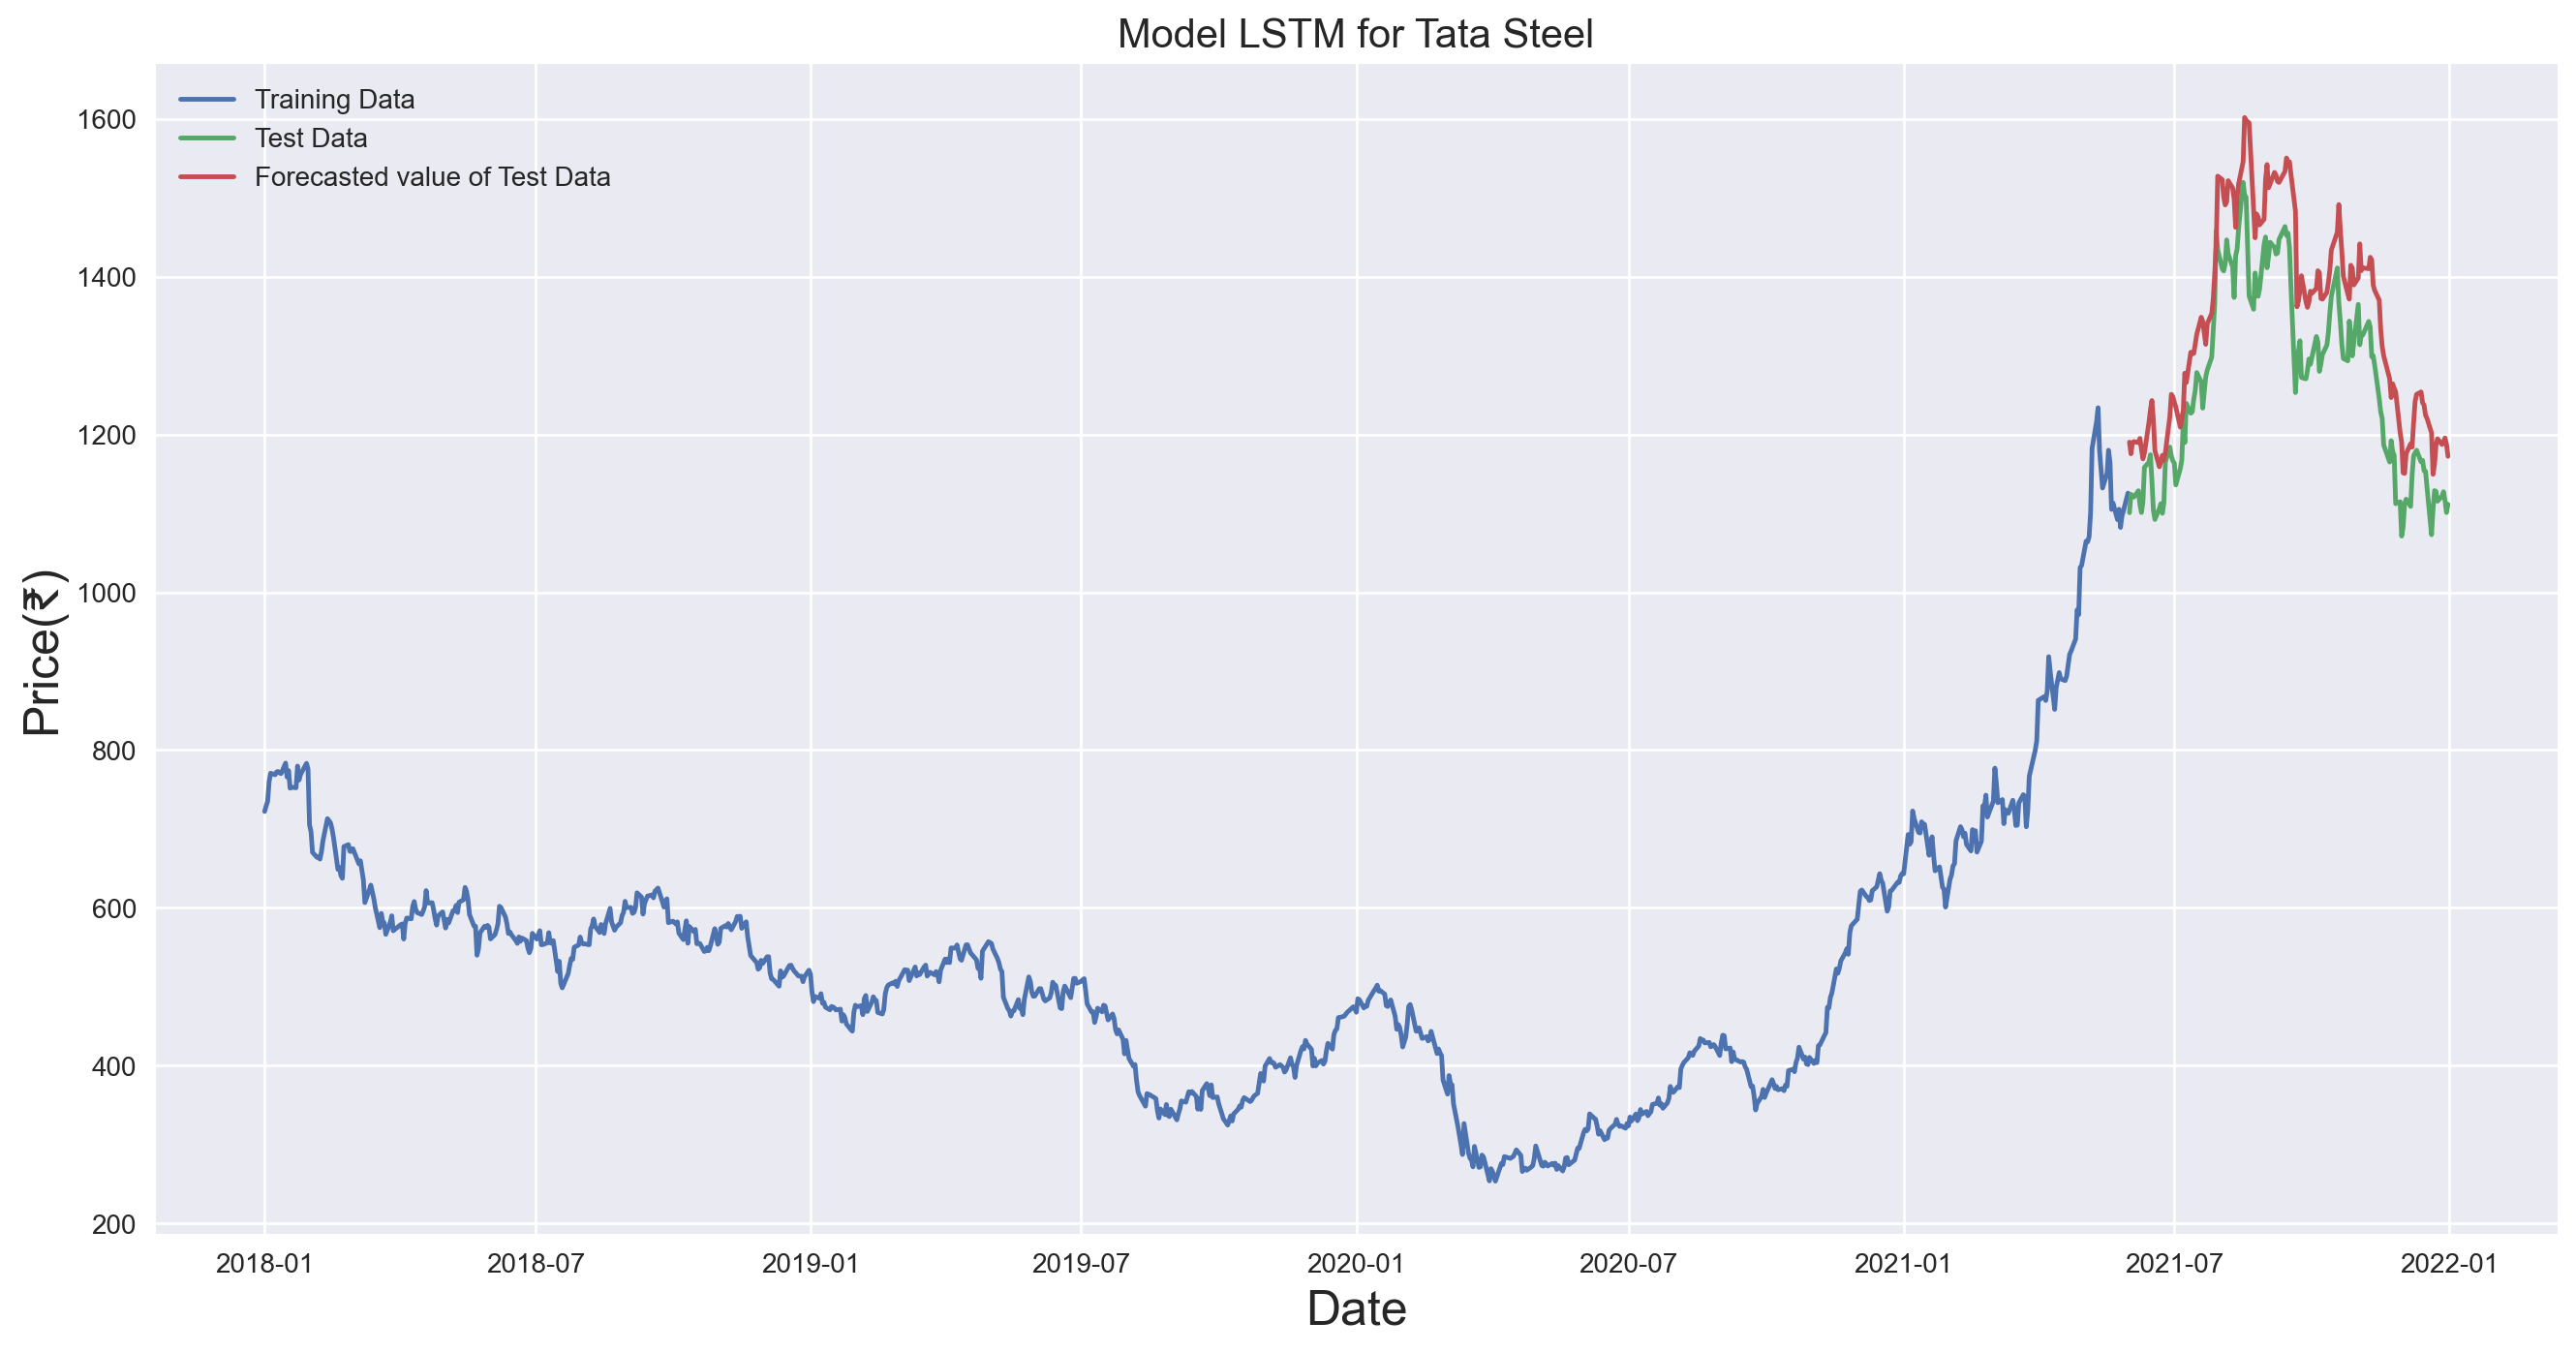

In [135]:
train=data[:training_data_size]
valid=data[training_data_size:]
t=data[n:training_data_size]
t["forecaste"]=predi
valid["predictions"]=predictions
plt.figure(figsize=(16,8),dpi=200)

plt.title("Model LSTM for Tata Steel",fontsize=15)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price(₹)",fontsize=18)
plt.plot(train["close"],label="Training Data")
plt.plot(valid["close"],label="Test Data")

plt.plot(valid["predictions"],label="Forecasted value of Test Data")
plt.legend(loc="upper left", fontsize=10);

In [138]:
import math
from sklearn.metrics import mean_squared_error

rmse_test=math.sqrt(mean_squared_error(predictions,y_test))

print(rmse_test)

85.216263237688


In [139]:
from sklearn.metrics import mean_absolute_error
MAPE_test=mean_absolute_error(predictions,y_test)
print(MAPE_test)

78.76527033625422
